In [1]:
import sys
sys.path.insert(1, '/ai/gno/CODE/DiffSR/')

import yaml
import torch
import matplotlib.pyplot as plt
import os.path as osp

from trainers import *
from datasets import NavierStokes2DDataset
from forecastors import BaseForecaster, DDPMForecaster

from matplotlib.patches import Ellipse
import numpy as np

from tqdm import tqdm

ModuleNotFoundError: No module named 'trainers'

In [7]:
fno_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/FNO2d_15_43_33'
fno = BaseForecaster(fno_dir)

unet_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/UNet2d_15_40_53'
unet = BaseForecaster(unet_dir)

ddpm_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/DDPM_16_36_07'
ddpm = DDPMForecaster(ddpm_dir)

sr3_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/SR3_17_42_28'
sr3 = DDPMForecaster(sr3_dir)

Building model: FNO2d
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/FNO2d_15_43_33/best_model.pth'
Building model: UNet2d
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/UNet2d_15_40_53/best_model.pth'
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/DDPM_16_36_07/best_model.pth'
=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_11/SR3_17_42_28/best_model.pth'


In [2]:
m2no_dir = '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_12/M2NO2d_13_12_31'
m2no = BaseForecaster(m2no_dir)

Building model: M2NO2d


=> loading checkpoint '/ai/gno/CODE/DiffSR/logs/NavierStokes2D/10_12/M2NO2d_13_12_31/best_model.pth'


In [3]:
data_args = m2no.data_args
dataset = NavierStokes2DDataset(data_args)
loader = torch.utils.data.DataLoader(dataset.test_dataset, batch_size=1, shuffle=False, num_workers=0)
normalizer = dataset.normalizer

Loading processed data from  /ai/gno/DATA/ns/ns_V1e-5_N1200_T202_sr.pt


In [5]:
m2no_metrics = m2no.forecast(loader, normalizer)

mse: 0.00208075 | rmse: 0.04561523 | psnr: 43.16110611 | ssim: 0.99038368 | Time: 6.62s


In [4]:
fno_metrics = fno.forecast(loader, normalizer)
unet_metrics = unet.forecast(loader, normalizer)
ddpm_metrics = ddpm.forecast(loader, normalizer)
sr3_metrics = sr3.forecast(loader, normalizer)

mse: 0.00199356 | rmse: 0.04464936 | psnr: 43.34700012 | ssim: 0.98808974 | Time: 1.03s
mse: 0.00230920 | rmse: 0.04805415 | psnr: 42.70868301 | ssim: 0.98915601 | Time: 0.81s


sampling loop time step: 100%|██████████| 2000/2000 [00:36<00:00, 55.54it/s]


mse: 0.11232755 | rmse: 0.33515304 | psnr: 25.83843994 | ssim: 0.84524155 | Time: 8803.57s


sampling loop time step: 100%|██████████| 2000/2000 [00:30<00:00, 65.81it/s]

mse: 0.11931486 | rmse: 0.34541982 | psnr: 25.57635880 | ssim: 0.83421141 | Time: 7399.24s


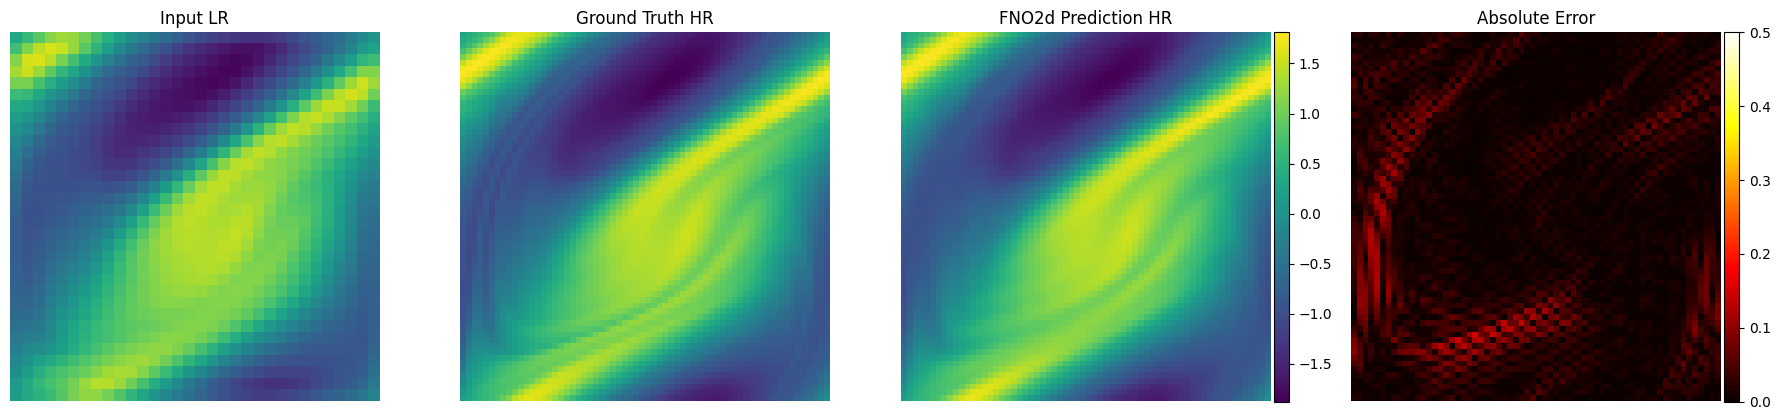

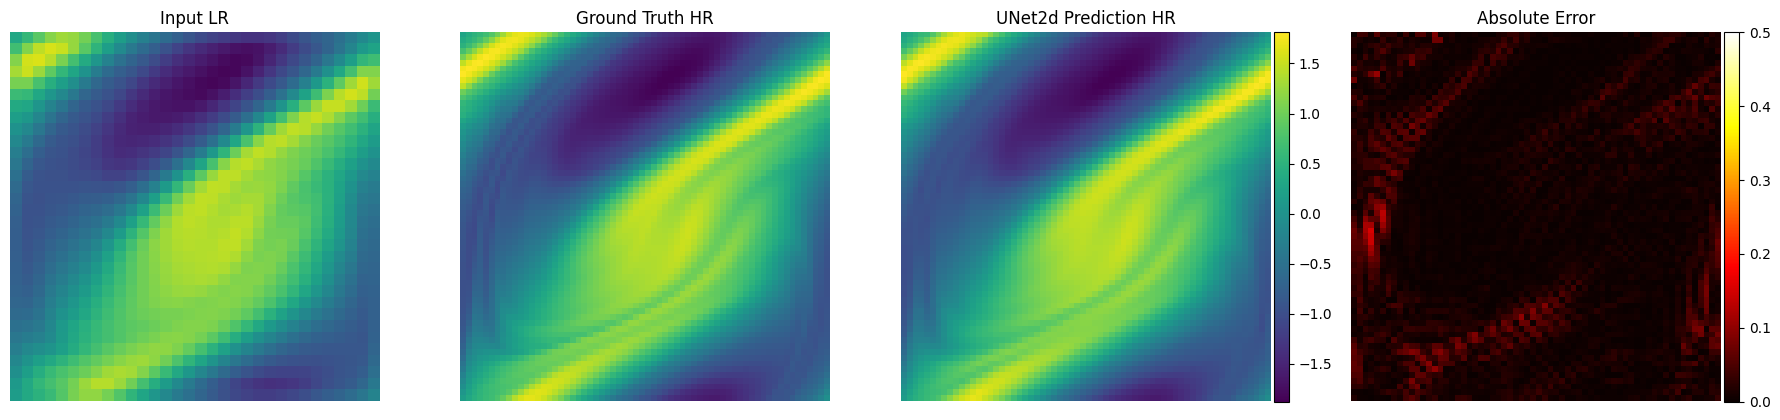

sampling loop time step: 100%|██████████| 2000/2000 [00:36<00:00, 54.75it/s]


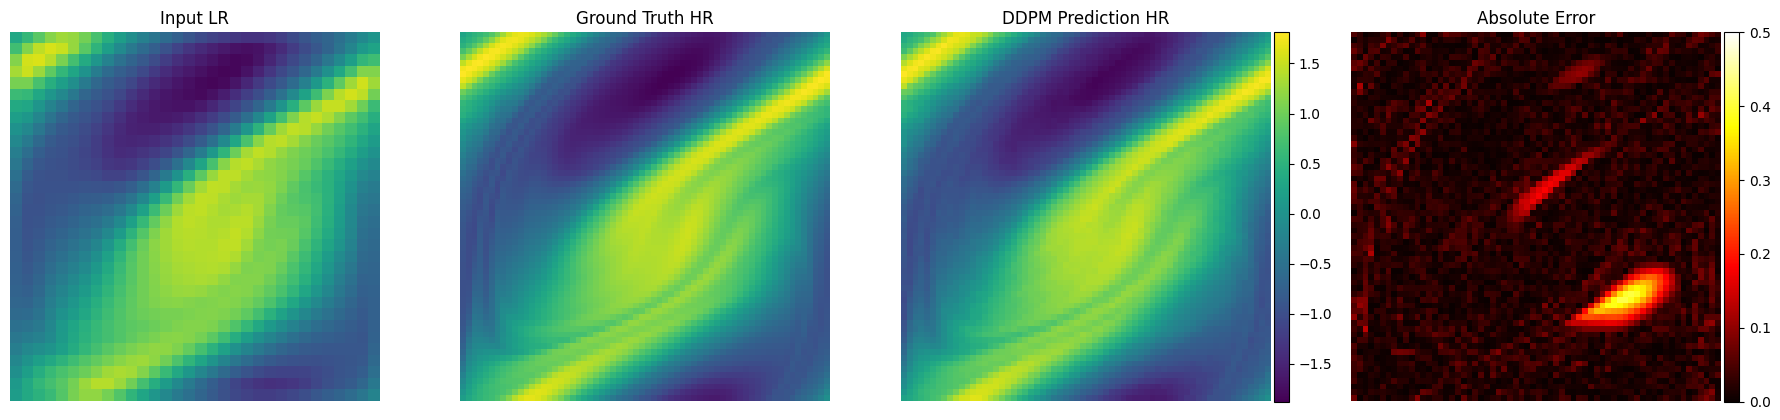

sampling loop time step: 100%|██████████| 2000/2000 [00:30<00:00, 65.43it/s]


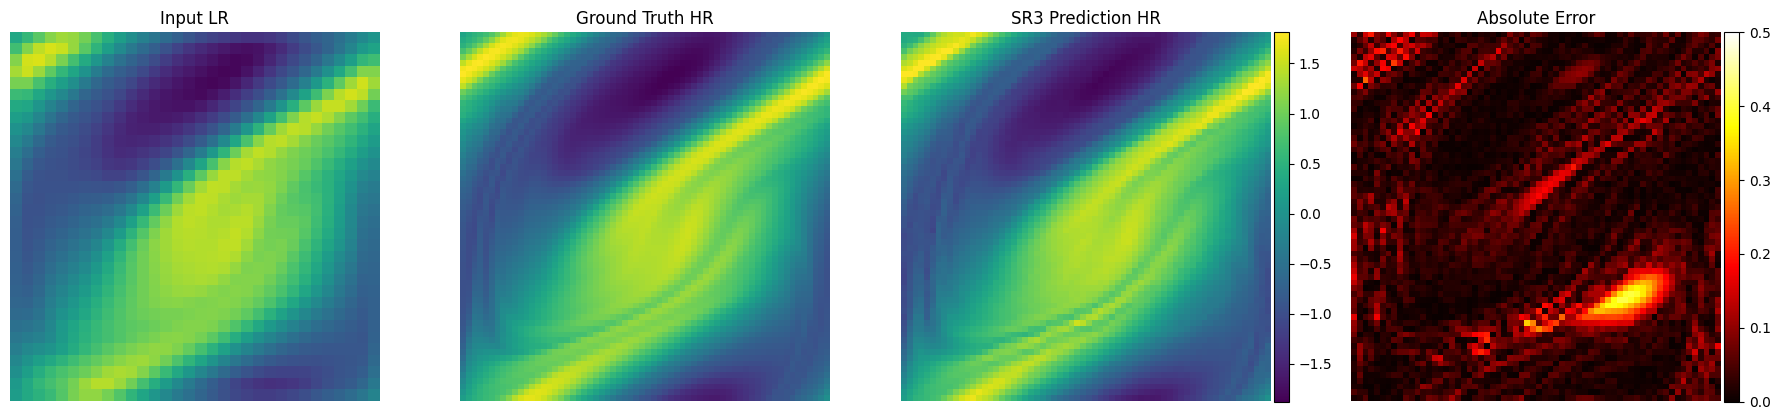

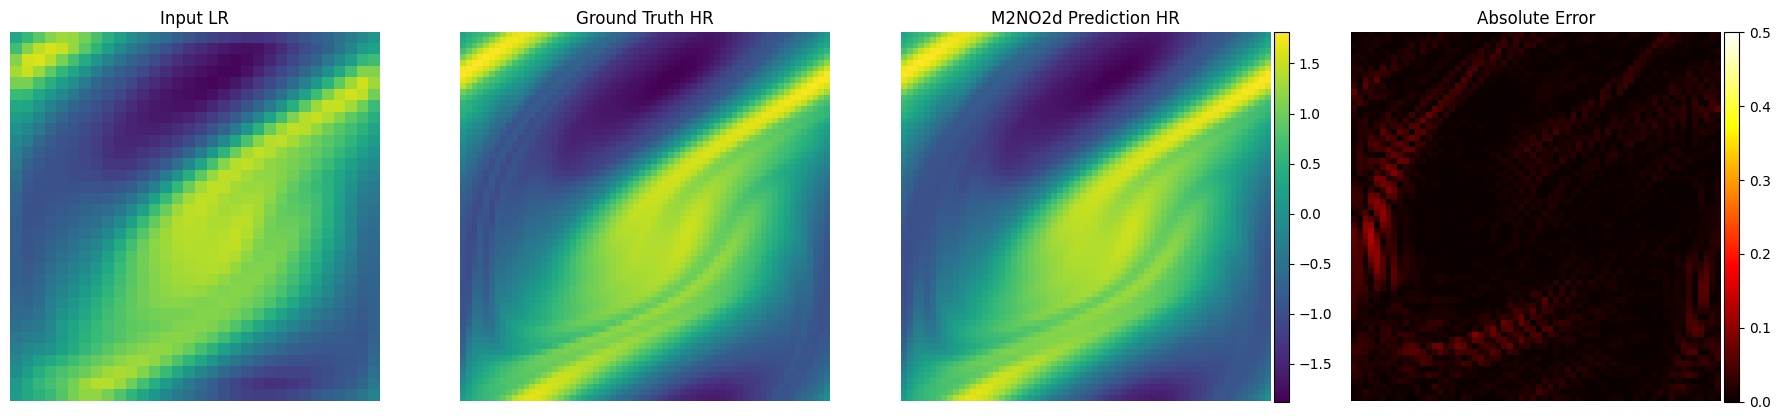

In [8]:
idx = 10
raw_x = loader.dataset[idx][0].unsqueeze(0)
raw_y = loader.dataset[idx][1].unsqueeze(0)

fno.vis_ns(raw_x, raw_y, normalizer, max_error=0.5)
unet.vis_ns(raw_x, raw_y, normalizer, max_error=0.5)
ddpm.vis_ns(raw_x, raw_y, normalizer, max_error=0.5)
sr3.vis_ns(raw_x, raw_y, normalizer, max_error=0.5)
m2no.vis_ns(raw_x, raw_y, normalizer, max_error=0.5)